In [3]:
!pip install  statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 17.2 MB/s eta 0:00:00


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.seasonal import STL

In [5]:
data = pd.read_csv("/content/BangloreDATA.csv")

In [7]:
data.head()

,YEAR,MO,DY,WS2M,T2M,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PRECTOTCORR,RH2M,QV2M,PS,WS10M,WS50M,WD50M,WD10M,RainToday,RainTomorrow
0,1981,1,1,2.85,21.00,22.26,14.48,29.09,14.62,0.00,68.69,10.80,91.90,4.05,5.69,83.75,83.81,0,1
1,1981,1,2,1.91,21.53,23.05,13.55,29.12,15.58,0.42,69.00,11.17,91.87,2.77,4.12,86.19,87.00,1,1
2,1981,1,3,2.41,21.14,22.53,13.03,29.07,16.04,0.86,68.69,10.86,91.88,3.48,5.16,75.94,76.75,1,0
3,1981,1,4,2.23,20.84,22.24,14.09,29.33,15.24,0.00,64.00,9.70,91.90,3.26,4.94,85.88,87.00,0,0
4,1981,1,5,1.73,20.61,22.21,16.45,30.23,13.77,0.00,62.44,9.09,91.94,2.59,4.11,102.56,104.31,0,0


In [8]:
data.isnull().sum()

,0
YEAR,0
MO,0
DY,0
WS2M,0
T2M,0
TS,0
T2M_RANGE,0
T2M_MAX,0
T2M_MIN,0
PRECTOTCORR,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15706 entries, 0 to 15705
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR          15706 non-null  int64  
 1   MO            15706 non-null  int64  
 2   DY            15706 non-null  int64  
 3   WS2M          15706 non-null  float64
 4   T2M           15706 non-null  float64
 5   TS            15706 non-null  float64
 6   T2M_RANGE     15706 non-null  float64
 7   T2M_MAX       15706 non-null  float64
 8   T2M_MIN       15706 non-null  float64
 9   PRECTOTCORR   15706 non-null  float64
 10  RH2M          15706 non-null  float64
 11  QV2M          15706 non-null  float64
 12  PS            15706 non-null  float64
 13  WS10M         15706 non-null  float64
 14  WS50M         15706 non-null  float64
 15  WD50M         15706 non-null  float64
 16  WD10M         15706 non-null  float64
 17  RainToday     15706 non-null  int64  
 18  RainTomorrow  15706 non-nu

In [11]:
data.rename(columns={'Yr': 'YEAR', 'MO': 'Month', 'DY': 'Day',"PRECTOTCORR":"Precipitation"}, inplace=True)

In [12]:
data.head(2)

,YEAR,Month,Day,WS2M,T2M,TS,T2M_RANGE,T2M_MAX,T2M_MIN,Precipitation,RH2M,QV2M,PS,WS10M,WS50M,WD50M,WD10M,RainToday,RainTomorrow
0,1981,1,1,2.85,21.00,22.26,14.48,29.09,14.62,0.00,68.69,10.80,91.90,4.05,5.69,83.75,83.81,0,1
1,1981,1,2,1.91,21.53,23.05,13.55,29.12,15.58,0.42,69.00,11.17,91.87,2.77,4.12,86.19,87.00,1,1


In [13]:
data['Date'] = pd.to_datetime(data[['YEAR', 'Month', 'Day']])
data.set_index('Date', inplace=True)

In [14]:
data.head(2)

,YEAR,Month,Day,WS2M,T2M,TS,T2M_RANGE,T2M_MAX,T2M_MIN,Precipitation,RH2M,QV2M,PS,WS10M,WS50M,WD50M,WD10M,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,
1981-01-01,1981,1,1,2.85,21.00,22.26,14.48,29.09,14.62,0.00,68.69,10.80,91.90,4.05,5.69,83.75,83.81,0,1
1981-01-02,1981,1,2,1.91,21.53,23.05,13.55,29.12,15.58,0.42,69.00,11.17,91.87,2.77,4.12,86.19,87.00,1,1


<Figure size 1200x600 with 0 Axes>

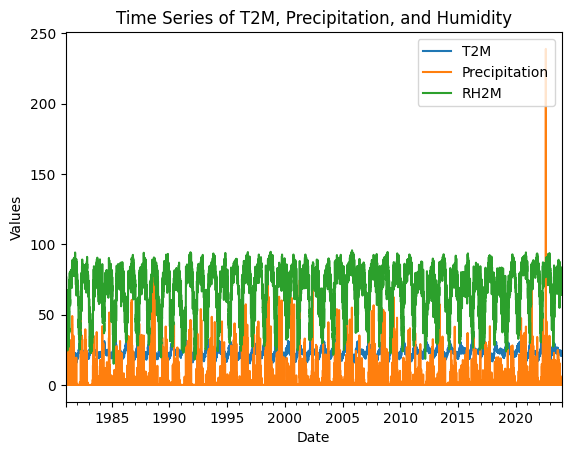

In [16]:
plt.figure(figsize=(12, 6))
data[['T2M', 'Precipitation', 'RH2M']].plot(title="Time Series of T2M, Precipitation, and Humidity")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend(loc='upper right')
plt.show()

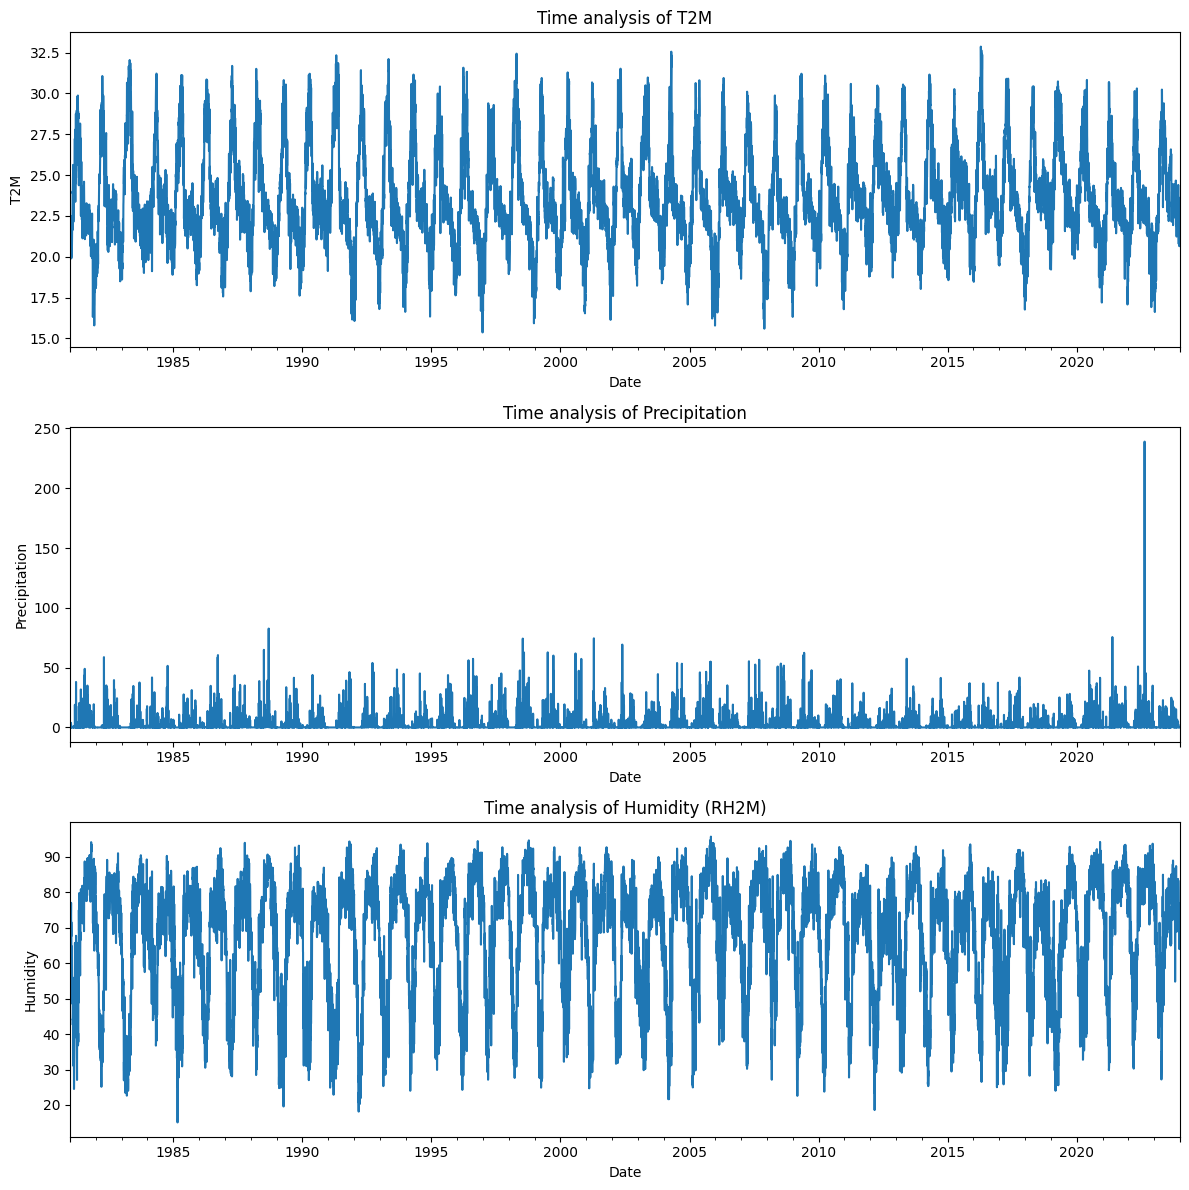

In [18]:
plt.figure(figsize=(12, 12))

# Plotting T2M
plt.subplot(3, 1, 1)
data['T2M'].plot(title="Time analysis of T2M")
plt.xlabel("Date")
plt.ylabel("T2M")

# Plotting PRECTOTCORR
plt.subplot(3, 1, 2)
data['Precipitation'].plot(title="Time analysis of Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation")

# Plotting RH2M
plt.subplot(3, 1, 3)
data['RH2M'].plot(title="Time analysis of Humidity (RH2M)")
plt.xlabel("Date")
plt.ylabel("Humidity")

plt.tight_layout()
plt.show()


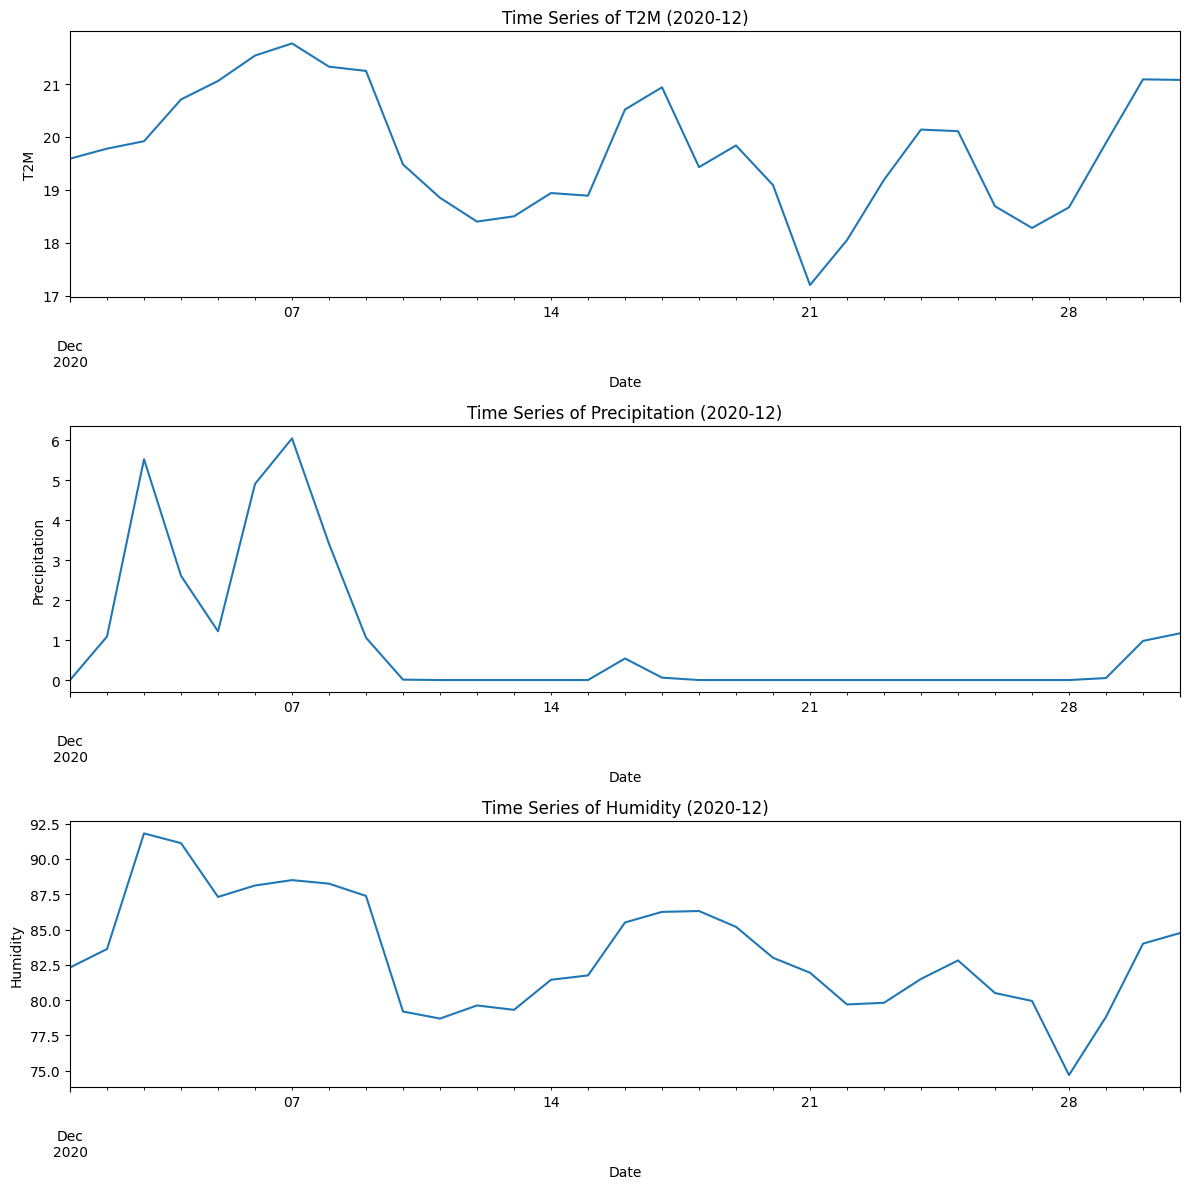

In [22]:

specific_year = 2020
specific_month = 12


filtered_data = data[(data.index.year == specific_year) & (data.index.month == specific_month)]


plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
filtered_data['T2M'].plot(title=f"Time Series of T2M ({specific_year}-{specific_month:02d})")
plt.xlabel("Date")
plt.ylabel("T2M")


plt.subplot(3, 1, 2)
filtered_data['Precipitation'].plot(title=f"Time Series of Precipitation ({specific_year}-{specific_month:02d})")
plt.xlabel("Date")
plt.ylabel("Precipitation")


plt.subplot(3, 1, 3)
filtered_data['RH2M'].plot(title=f"Time Series of Humidity ({specific_year}-{specific_month:02d})")
plt.xlabel("Date")
plt.ylabel("Humidity")

plt.tight_layout()
plt.show()


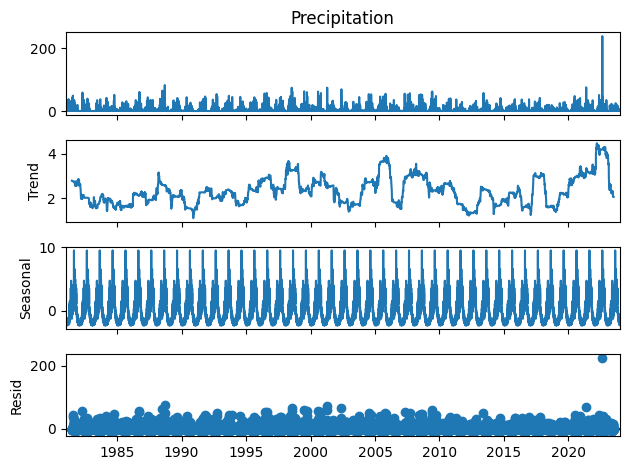

In [24]:
# Seasonal Decomposition for T2M
decompose_result = seasonal_decompose(data['Precipitation'], model='additive', period=365)
decompose_result.plot()
plt.show()



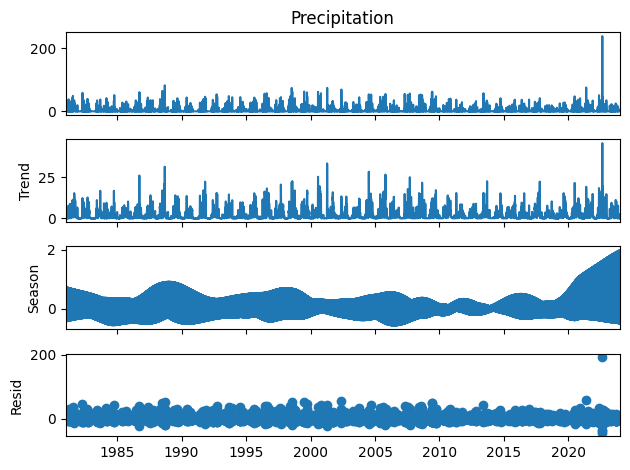

In [31]:
stl = STL(data['Precipitation'], seasonal=365)
result = stl.fit()

result.plot()
plt.show()


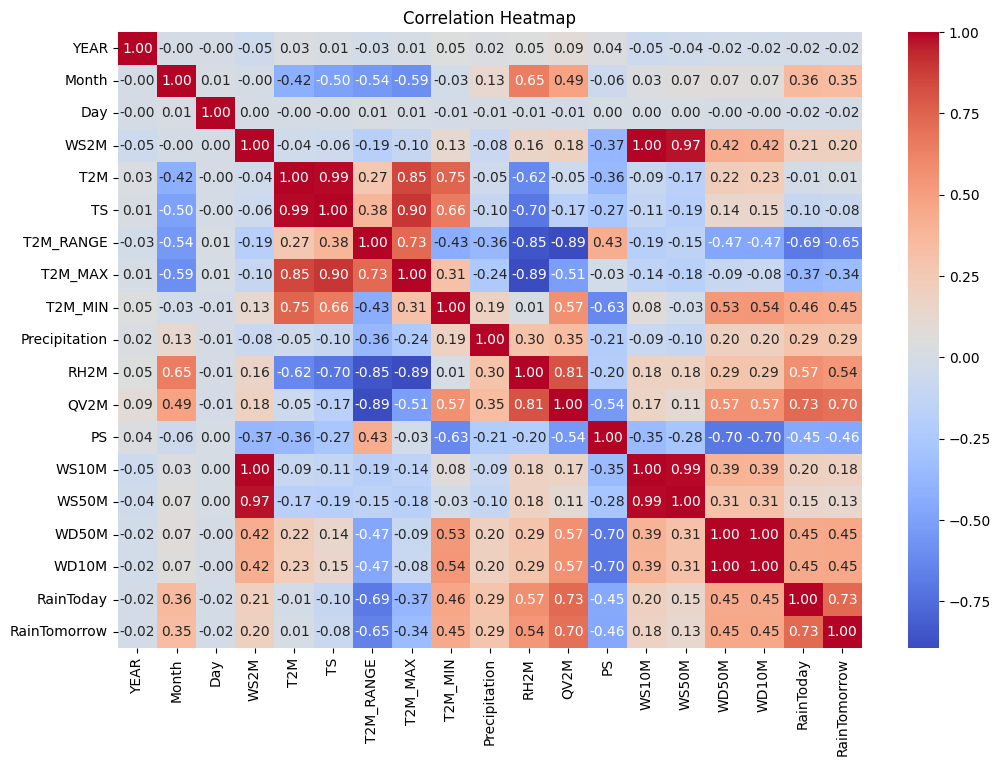

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

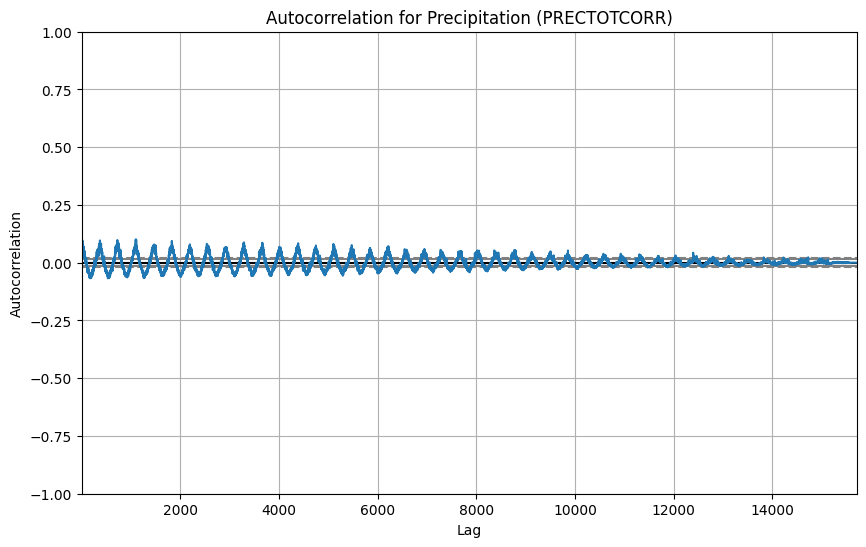

In [37]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(data['Precipitation'])
plt.title("Autocorrelation for Precipitation (PRECTOTCORR)")
plt.show()



<ipython-input-38-450cf14653c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='RainTomorrow', palette='viridis')


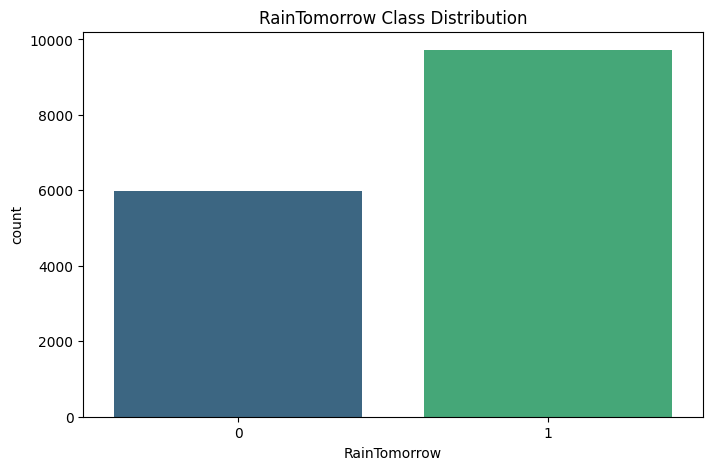

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='RainTomorrow', palette='viridis')
plt.title("RainTomorrow Class Distribution")
plt.show()